In [19]:
import numpy as np
import matplotlib.pyplot as plt

# import time
import torch
import torch.optim as optim
import torch.nn.functional as F
from argparse import ArgumentParser
from torch.distributions import MultivariateNormal

from nf.TNF import *
from nf.models import NormalizingFlowModel

from tensorboardX import SummaryWriter

from shapely.geometry import Point, Polygon
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D


In [20]:
# Define fixed colormap
myCmap = plt.cm.viridis  
cmap_norm = plt.Normalize(vmin=-1, vmax=1)  # Define the range of the colormap

distMean = np.array([0.,0.,0.])
distCov = np.array([        [42.8, 0., 0.],
                            [0., 63.2, 0.],
                            [0., 0., 0.37]    ])

In [21]:
def plot_data(samples, isColor=False, **kwargs):

    if isColor:
        x = samples[:, 0]
        y = samples[:, 1]
        colors = samples[:, 2]    
        plt.scatter(x, y, c=colors, cmap=myCmap, alpha=0.5, s=5.5, norm=cmap_norm)
        plt.colorbar(label='alpha')
        plt.xlabel('x')
        plt.ylabel('y')

    else:
        plt.scatter(samples[:, 0], samples[:, 1], s=1, marker="o", **kwargs)    
        plt.xlabel("x")
        plt.ylabel("y")

# read the hull points from file
with open('hull_points.txt', 'r') as f:
    lines = f.readlines()
    cell_coords = np.zeros((len(lines), 2))
    for i in range(len(lines)):
        line = lines[i].split('\t')
        cell_coords[i,0] = float(line[0]) - 194.4821
        cell_coords[i,1] = float(line[1]) - 187.9119
        # cell_coords[i,0] = float(line[0])
        # cell_coords[i,1] = float(line[1])

# print(cell_coords)
# close the polygon
cell_coords_closed = np.append(cell_coords, [cell_coords[0]], axis=0)
        
cutoff = 20
numchosen = 89
datapoints = np.zeros((cutoff*numchosen,3))
# read from file the first, second, and fourth columns
with open('new_traj_frame_wise.txt', 'r') as f:
    for i in range(cutoff*numchosen):
        line = f.readline()
        line = line.split('\t')
        # datapoints[i,0] = float(line[0])
        # datapoints[i,1] = float(line[1])
        datapoints[i,0] = float(line[0]) - 194.4821
        datapoints[i,1] = float(line[1]) - 187.9119
        datapoints[i,2] = float(line[3])
        # datapoints[i,3] = float(line[3])

print('shape of datapoints', datapoints.shape)

shape of datapoints (1780, 3)


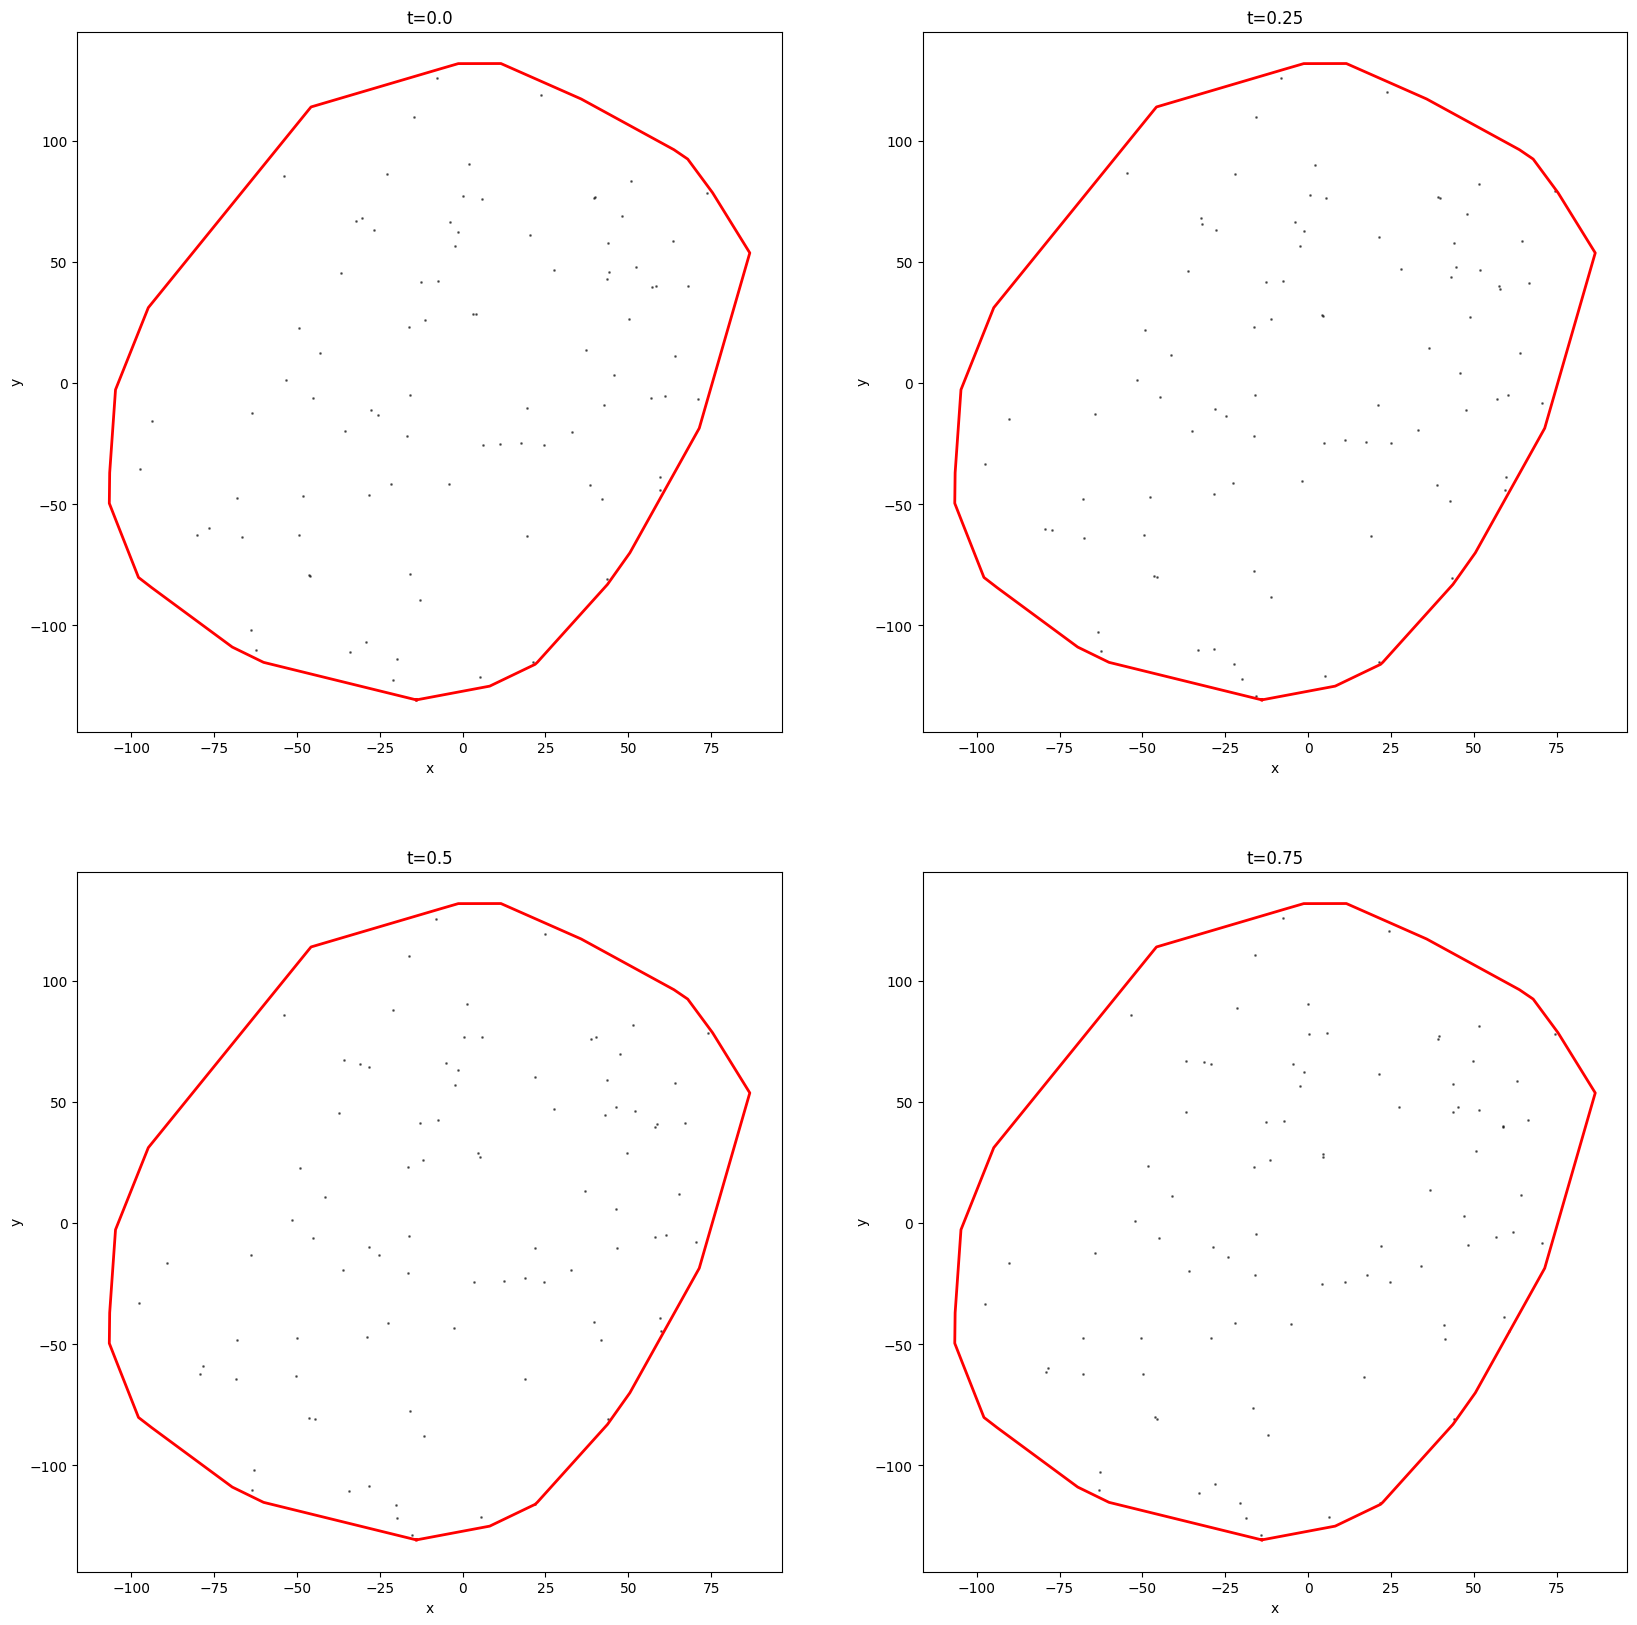

MovieWriter ffmpeg unavailable; using Pillow instead.


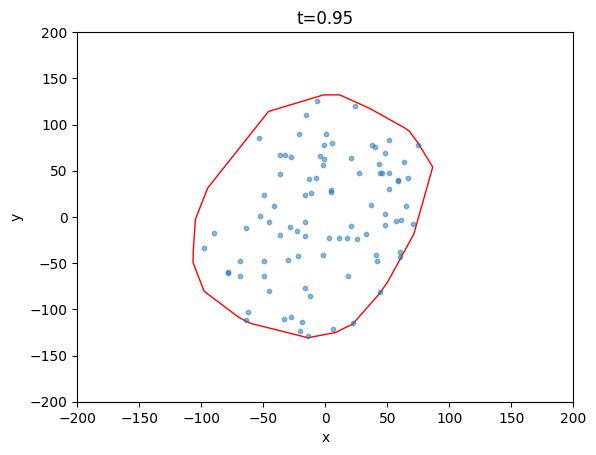

In [22]:
# Resampling
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
# samples = model.sample(10000, t=0).data
# select the first entry in every cutoff entries
curdata1 = datapoints[0:90, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata1, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.0")

plt.subplot(2, 2, 2)
# samples = model.sample(10000, t=0.25).data
curdata2 = datapoints[5*89:6*89+1, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata2, isColor=False, color="black", alpha=0.5)
# plt.grid()
# plt.xlim((0,300))
# plt.ylim((0,350))
plt.title("t=0.25")

plt.subplot(2, 2, 3)
# samples = model.sample(10000, t=0.5).data
curdata3 = datapoints[10*89:11*89+1, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata3, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.5")

plt.subplot(2, 2, 4)
# samples = model.sample(10000, t=0.75).data
curdata4 = datapoints[15*89:16*89+1, :]
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(curdata4, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.75")
plt.show()

# show a gif of the distribution over time using FuncAnimation
fig, ax = plt.subplots()
ax.set_xlim((-200, 200))
ax.set_ylim((-200, 200))
polygon = plt.Polygon(cell_coords_closed, closed=True, fill=None, edgecolor='r')
ax.add_patch(polygon)
# sc = plt.scatter([], [], s=10, c=[], cmap=myCmap, alpha=0.5, norm=cmap_norm)
sc = plt.scatter([], [], s=10,alpha=0.5)
# plt.colorbar(sc, label='alpha')
plt.xlabel('x')
plt.ylabel('y')

def update(frame):
    # samples = model.sample(5000, t=frame).data
    samples = datapoints[int(frame*20*89):int((frame+0.05)*20*89), 0:3]
    # print(samples.shape)
    sc.set_offsets(samples)
    # sc.set_array(samples[:,2])
    # set title
    ax.set_title(f't={frame:.2f}')
    return sc,
ani = FuncAnimation(fig, update, frames=np.linspace(0, 1, 21)[:-1], blit=True)
ani.save('2D_org_data.gif', fps=3)
# plt.show()

In [23]:
# load the model
model = torch.load('2Duni.pth')
# model.eval()

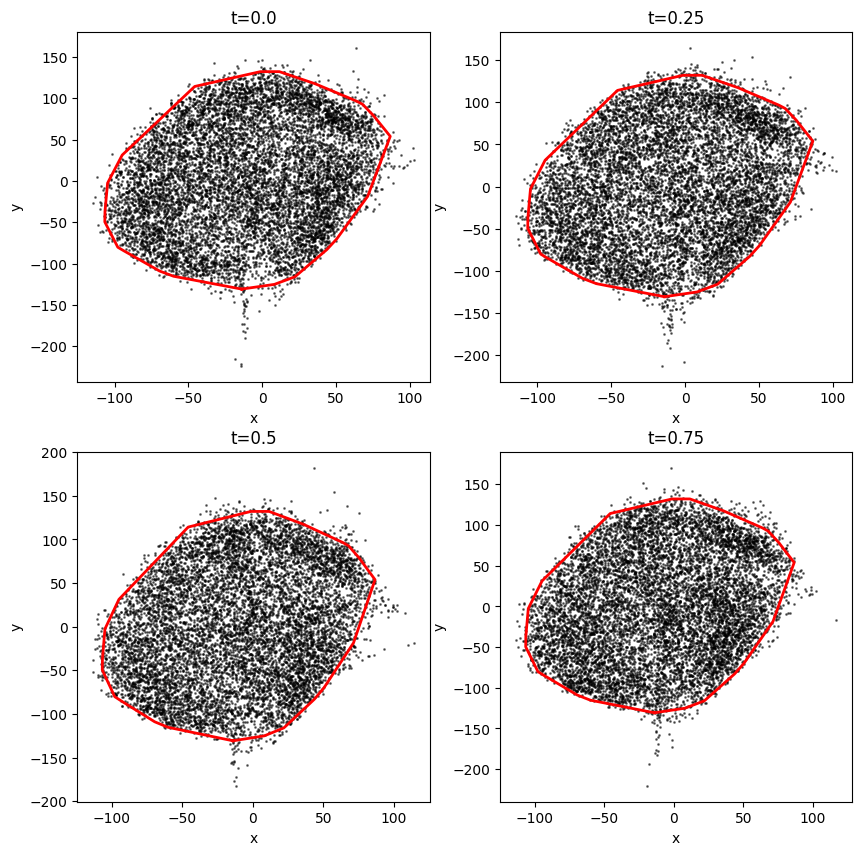

In [24]:
# Resampling
plt.figure(figsize=(10,10))

plt.subplot(2, 2, 1)
samples = model.sample(10000, t=0).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.0")

plt.subplot(2, 2, 2)
samples = model.sample(10000, t=0.25).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.25")

plt.subplot(2, 2, 3)
samples = model.sample(10000, t=0.5).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.5")

plt.subplot(2, 2, 4)
samples = model.sample(10000, t=0.75).data
plt.plot(cell_coords_closed[:,0], cell_coords_closed[:,1], color='red', linestyle='-', linewidth=2)
plot_data(samples, isColor=False, color="black", alpha=0.5)
# plt.xlim((0,400))
# plt.ylim((0,400))
plt.title("t=0.75")
plt.show()


In [52]:
# generate 1000 random walks using 3D normal distribution with 20 steps each

# parameters
numRandWalks = 50
numSteps = 20
numDims = 3
stepSize = 0.1
mean = np.array([194.4821, 187.9119, 0.3752])
cov = np.array([
    [42.8, 0., 0.],
    [0., 63.2, 0.],
    [0., 0., 0.37]  
])

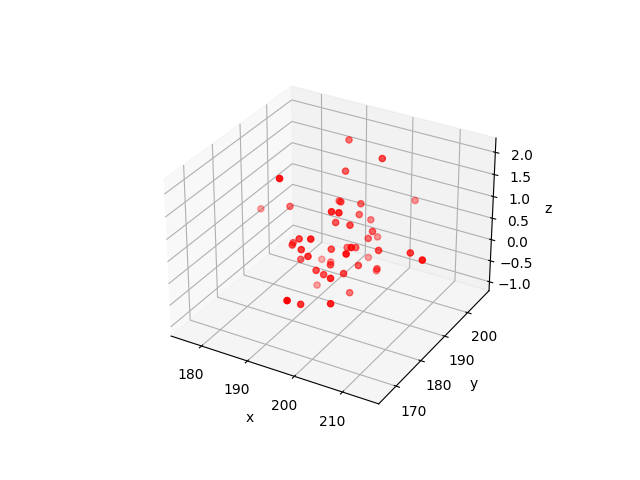

In [53]:
startingPoints = np.random.multivariate_normal(mean, cov, numRandWalks)
# for point in startingPoints:
#     print(point)

%matplotlib widget
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(startingPoints[:,0], startingPoints[:,1], startingPoints[:,2], c='r', marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [54]:
# random walk of 20 steps in 3D with specified variance
%matplotlib widget
randWalkTrajs = np.zeros((numRandWalks, numSteps, numDims))

for i in range(numRandWalks):
    curPoint = startingPoints[i]
    randWalkTrajs[i, 0, :] = curPoint
    # fig2 = plt.figure()
    # ax = fig2.add_subplot(111, projection='3d')
    # ax.scatter3D(curPoint[0], curPoint[1], curPoint[2], c='r', marker='o')
    for j in range(numSteps):
        orgPoint = curPoint
        curPoint = curPoint + stepSize*np.random.multivariate_normal(np.zeros(numDims), distCov)
        randWalkTrajs[i, j, :] = curPoint
        # scatter plot with connecting lines to show the walk
    #     ax.scatter3D(curPoint[0], curPoint[1], curPoint[2], c='b', marker='o')
    #     ax.plot([orgPoint[0], curPoint[0]], [orgPoint[1], curPoint[1]], [orgPoint[2], curPoint[2]], c='b')        
    # ax.set_xlabel('x')
    # ax.set_ylabel('y')
    # ax.set_zlabel('z')
    # plt.show()

print(randWalkTrajs.shape)
print(randWalkTrajs)